# Heart Rate Calculation
## by Tiffany Nguyen
### Purpose
The purpose of this project is to process audio data in a heartbeat wav file and calculate heart rate based on the identified peaks.
### Process
- Load heart sound file using `soundfile`
- Plot the heart sound wayform with `matplotlib` and `numpy`
- Get the amplitude of the wayform
- Filter the data to get rid of noise
- Identify the location of each peak using `scipy`
- Calculate the heart rate

In [1]:
pip install soundfile

Note: you may need to restart the kernel to use updated packages.


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import soundfile as sf

In [3]:
#Load audio file
heartSoundFile = '/Users/tiffanynguyen/Downloads/tagged/SCU/BIOE 45/Lab/Week 5/heart_sound.wav'
data, Fs = sf.read(heartSoundFile) #data is value, Fs is data rate

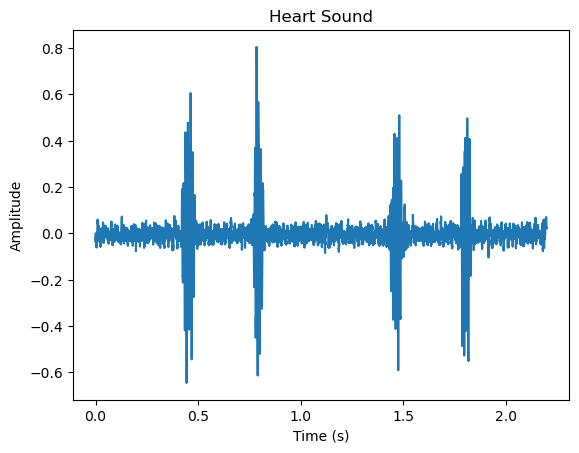

In [5]:
#plot the wayform
t = np.arange(0, len(data)) / Fs
plt.plot(t, data)
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.title('Heart Sound')
plt.show()

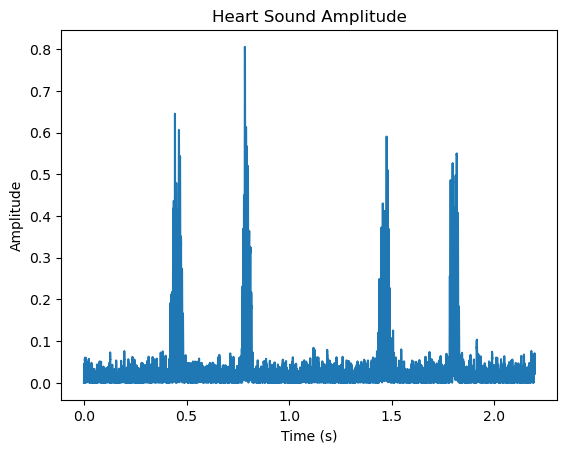

In [6]:
#Get the amplitude (absolute value)
data_abs = np.fabs(data)
plt.plot(t, data_abs)
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.title('Heart Sound Amplitude')
plt.show()

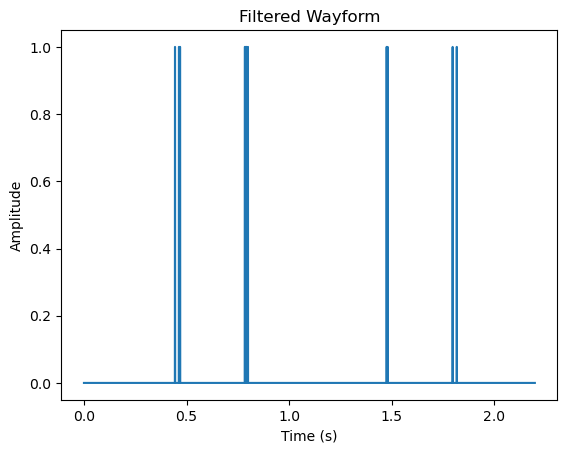

In [7]:
#Get rid of noise by filtering the data (>.5 is 1, <.5 is 0)
data_filtered = np.zeros(len(data_abs))
for i in range(len(data_abs)):
    data_filtered[i] = 0 if data_abs[i] <0.5 else 1
plt.plot(t, data_filtered)
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.title('Filtered Wayform')
plt.show()

In [8]:
!pip install scipy

In [9]:
from scipy.signal import find_peaks

In [10]:
#Find four peaks
peaks, _ = find_peaks(data_filtered, distance=1000)
print(peaks)

[ 5160  8808 16314 20027]


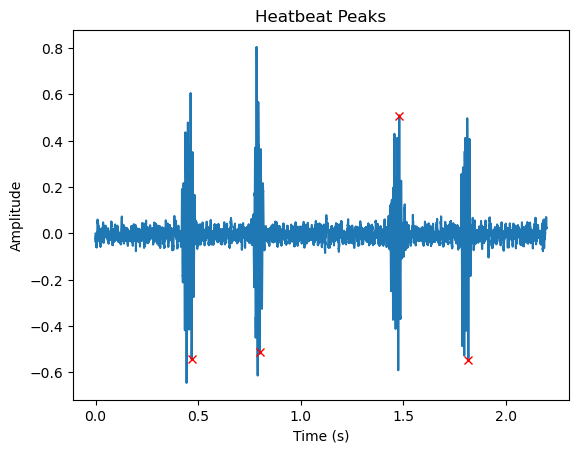

In [11]:
#visualize identified peaks on the original graph
plt.plot(t, data)
plt.plot(t[peaks], data[peaks], "rx")
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.title('Heatbeat Peaks')
plt.show()

In [12]:
#Calcualte bpm
time_between_beats = peaks[2] - peaks[0]
time_between_beats_sec = time_between_beats / Fs
beats_per_sec = 1 / time_between_beats_sec
beats_per_minute = beats_per_sec * 60
print("Beats Per Minute:", beats_per_minute)

Beats Per Minute: 59.306078536847764


In [13]:
#Alternative, simpler way to directly get peaks without processing audio file
peaks, _ = find_peaks(data, height = 0.4, distance=1000)
print(peaks)

[ 5104  8647 16315 19968]
